<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/44_Day_outlier_detection_winsorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('/content/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [7]:
df['Weight'].describe()

,Weight
count,10000.000000
mean,161.440357
std,32.108439
min,64.700127
25%,135.818051
50%,161.212928
75%,187.169525
max,269.989699


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-12-2646496094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

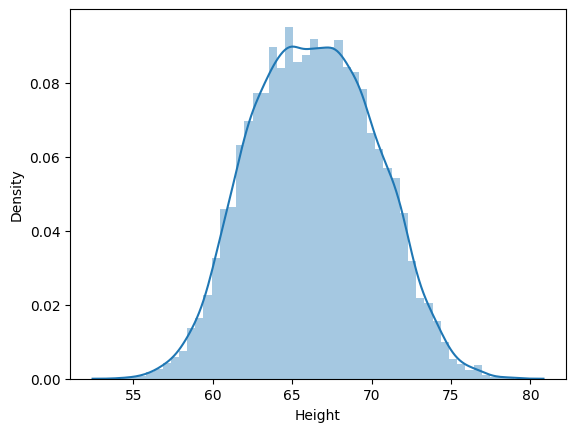

In [12]:
sns.distplot(df['Height'])


/tmp/ipython-input-13-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

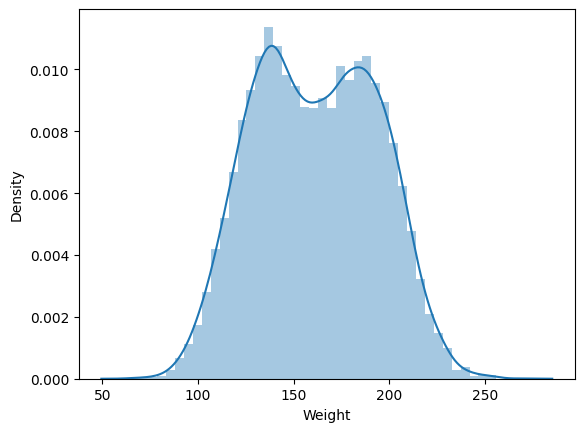

In [13]:
sns.distplot(df['Weight'])

<Axes: ylabel='Height'>

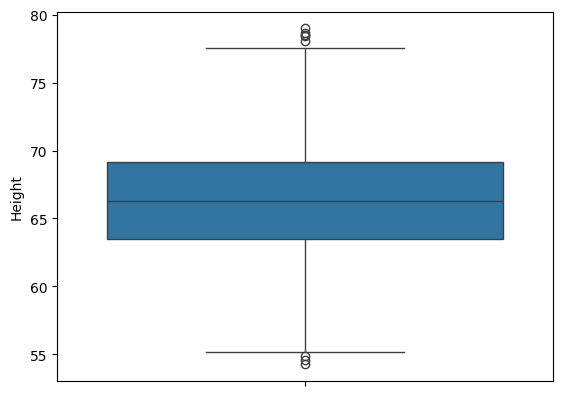

In [9]:
sns.boxplot(df['Height'])

In [16]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)
print("upper=",upper_limit)
print("lower=",lower_limit)

upper= 74.7857900583366
lower= 58.13441158671655


In [18]:
# trimming
new_df=df[(df['Height'] <= 74.78) & (df['Height'] >= 58.1344) ]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [19]:
new_df['Height'].describe()

,Height
count,9799.000000
mean,66.363507
std,3.644267
min,58.134496
25%,63.577147
50%,66.317899
75%,69.119859
max,74.767447


/tmp/ipython-input-20-1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

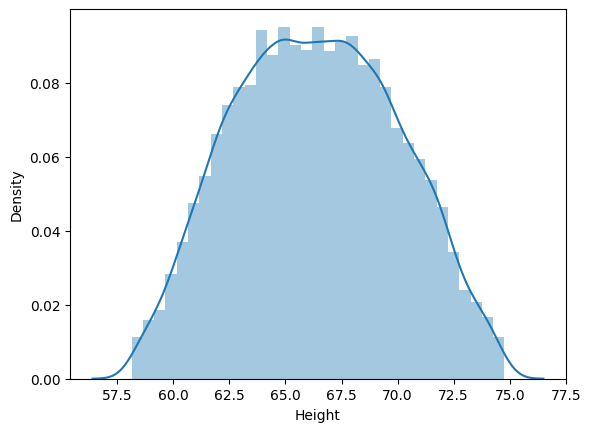

In [20]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

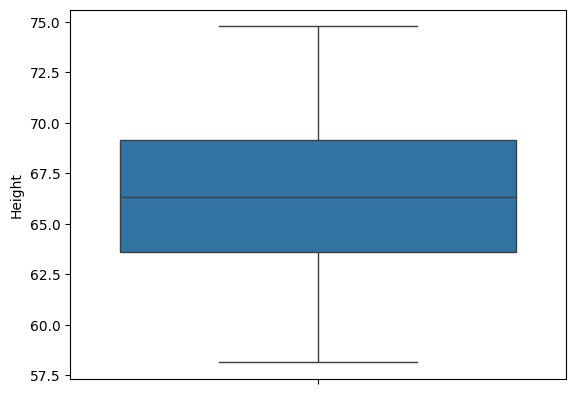

In [21]:
sns.boxplot(new_df['Height'])

In [25]:
# winsorization

df['Height']=np.where(df['Height']>74.78,
                74.78,
               np.where(df['Height']<lower_limit,lower_limit,df['Height']))

In [26]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366222
std,3.795588
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.780000


/tmp/ipython-input-27-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

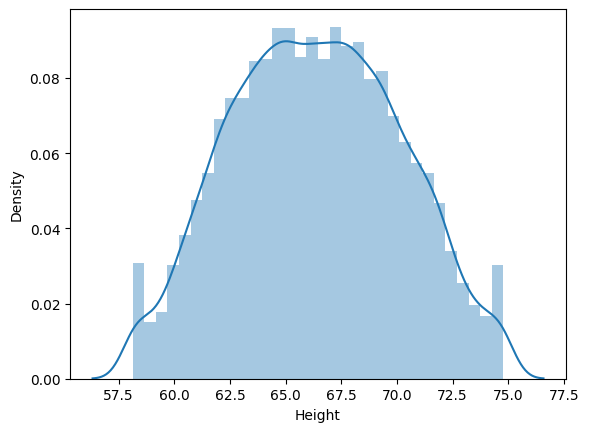

In [27]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

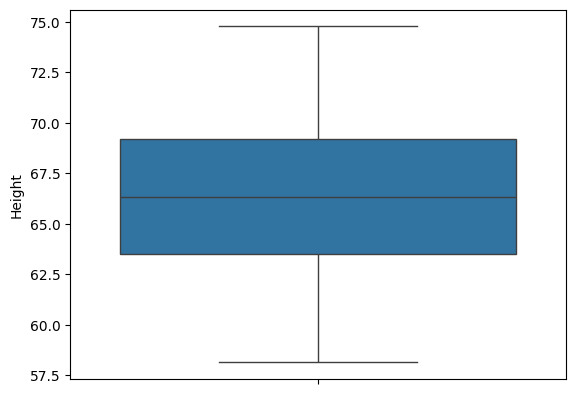

In [28]:
sns.boxplot(df['Height'])